In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data_eda.csv')

### Choose Relevant Models

In [3]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'hourly', 'employer_provided', 'min_salary',
       'max_salary', 'avg_salary', 'company_txt', 'job_state', 'same_state',
       'age', 'python', 'r_studio', 'spark', 'aws', 'excel', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [4]:
df_model = df[['avg_salary', 'Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'job_state', 'same_state', 'age', 'python', 'aws', 'excel', 'spark', 'excel', 'job_simp', 'seniority', 'desc_len']]

### Get Dummy Data Variables

In [5]:
df_dum = pd.get_dummies(df_model)

### Train, Test Split

In [6]:
from sklearn.model_selection import train_test_split
X = df_dum.drop('avg_salary', axis = 1)
y = df_dum.avg_salary.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Multi-linear Regression

In [7]:
import statsmodels.api as sm
X_sm = X =  sm.add_constant(X)
model = sm.OLS(y.astype(float), X.astype(float))
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     10.21
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           1.48e-94
Time:                        16:25:14   Log-Likelihood:                -3311.7
No. Observations:                 742   AIC:                             6909.
Df Residuals:                     599   BIC:                             7568.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                43.6012      6.720      6.488      0.000      30.404      56.799
Rating                                                3.6051      1.937      1.861      0.063      -0.200       7.410
num_comp                                              2.2511      0.868      2.593      0.010       0.546       3.956
hourly                                              -36.5821      9.173     -3.988      0.000     -54.597     -18.567
employer_provided                                    31.3641     11.524      2.722      0.007       8.731      53.997
same_state                                            2.4813      2.619      0.948      0.344      -2.661       7.624
age                                                   0.0348      0.030      1.160      0.246      -0.024       0.094
python                                                8.1363      2.523      3.224      0.001       3.180      13.092
aws                                                   1.1228      2.736      0.410      0.682      -4.250       6.496
excel                                                -0.2010      1.134     -0.177      0.859      -2.428       2.026
spark                                                -0.5715      2.921     -0.196      0.845      -6.307       5.164
excel                                                -0.2010      1.134     -0.177      0.859      -2.428       2.026
desc_len                                             -0.0001      0.001     -0.171      0.864      -0.002       0.001
Size_-1                                              13.6196      8.629      1.578      0.115      -3.328      30.567
Size_1 to 50 employees                                1.1087      6.501      0.171      0.865     -11.659      13.876
Size_10000+ employees                                -2.9049      5.801     -0.501      0.617     -14.297       8.487
Size_1001 to 5000 employees                           6.1218      3.880      1.578      0.115      -1.498      13.741
Size_201 to 500 employees                             2.2418      3.873      0.579      0.563      -5.364       9.848
Size_5001 to 10000 employees                         -3.8783      5.443     -0.713      0.476     -14.568       6.811
Size_501 to 1000 employees                            2.1611      4.059      0.532      0.595      -5.811      10.133
Size_51 to 200 employees                              4.1816      4.422      0.946      0.345      -4.502      12.865
Size_Unknown                                         20.9498     13.993      1.497      0.135      -6.532      48.432
Type of ownership_-1                                 13.6196      8.629      1.578      0.115      -3.328      30.567
Type of ownersh

In [8]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [21]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [10]:
cross_val_score(lm, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3)

array([-2.91991603e+07, -3.02322186e+08, -1.25697385e+06])

### Lasso Regression

In [22]:
lml = Lasso(alpha = 0.13)
lml.fit(X_train, y_train)

Lasso(alpha=0.13)

In [23]:
cross_val_score(lml, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3)

array([-19.90278347, -18.58608764, -19.29867415])

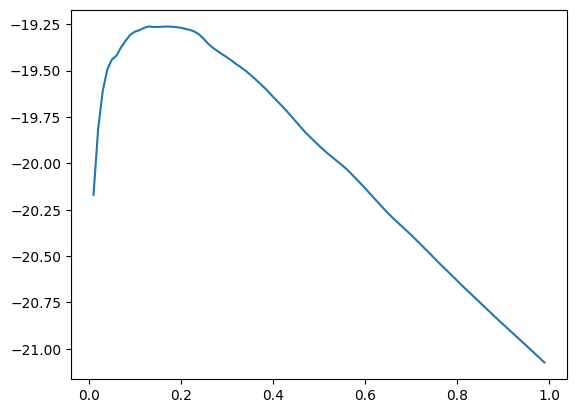

In [12]:
alpha = []
error = []

for i in range(1, 100):
    alpha.append(i/100)
    lml = Lasso(alpha = (i/100))
    error.append(np.mean(cross_val_score(lml, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3)))

plt.plot(alpha, error)

In [13]:
error = tuple(zip(alpha, error))

In [14]:
df_err = pd.DataFrame(error, columns = ['alpha', 'error'])

In [15]:
df_err[df_err.error == max(df_err.error)]

,alpha,error
12,0.13,-19.262515


### Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
np.mean(cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3))

-15.021721401835618

### Hyperparameter Tuning: GridSearchCV

In [17]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': range(10, 300, 10), 'criterion': ("squared_error", "absolute_error"), 'max_features': ('auto', 'sqrt', 'log2')}

In [18]:
gs = GridSearchCV(rf, parameters, scoring = 'neg_mean_absolute_error', cv = 3)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('squared_error', 'absolute_error'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [20]:
gs.best_score_
gs.best_estimator_

RandomForestRegressor(n_estimators=250)

### Test Ensembles

In [27]:
tpred_lm = lm.predict(X_test)
tpred_lml = lml.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, tpred_lm)

2876264.5708093136

In [30]:
mean_absolute_error(y_test, tpred_lml)

19.66539395547256

In [35]:
mean_absolute_error(y_test, tpred_rf)

10.805100671140938

In [34]:
mean_absolute_error(y_test, (tpred_lml + tpred_rf)/2)

14.712269368930171